In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd

In [40]:
seed,n_pt,m=1,10,2
w=[-1+2*random.random(),random.random()]
b=[random.random(),random.random()]

random.seed(seed)
dataPointSet=[]
i=0
label=[]
while i<n_pt:
    dataPointSet.append([])
    for j in range(m):
        dataPointSet[-1].append(-10+random.random()*20)
    x=dataPointSet[-1]
    if w[0]*x[0]+w[1]*x[1]>=b[1]:
            #x.append([1,0,0])
        label.append(1)
        i=i+1
    elif w[0]*x[0]+w[1]*x[1]<=b[0]:
        label.append(-1)
        i=i+1
    else:
        dataPointSet.remove(x)

In [41]:
dataPointSet_n = np.array(dataPointSet)
print(dataPointSet_n)
print("\n")

X1 = dataPointSet_n[:,0]
X2 = dataPointSet_n[:,1]
X1 = np.array([X1])
X2 = np.array([X2])
X1_t = X1.transpose()
X2_t = X2.transpose()
print(X1)
print(X2)

[[-7.31271512  6.94867474]
 [ 5.27549238 -4.89861949]
 [-0.09129826 -1.0101787 ]
 [ 3.03185945  5.77446702]
 [-8.12280826 -9.43305047]
 [ 6.71530208 -1.34465864]
 [ 5.24560165 -9.95787893]
 [-1.09225612  4.43080065]
 [-5.42475557  8.90541391]
 [ 8.02854915 -9.38820034]]


[[-7.31271512  5.27549238 -0.09129826  3.03185945 -8.12280826  6.71530208
   5.24560165 -1.09225612 -5.42475557  8.02854915]]
[[ 6.94867474 -4.89861949 -1.0101787   5.77446702 -9.43305047 -1.34465864
  -9.95787893  4.43080065  8.90541391 -9.38820034]]


In [42]:
label_n=np.array([label])
label_nt=label_n.transpose()

print(label)
print(label_nt)

[1, -1, -1, 1, -1, -1, -1, 1, 1, -1]
[[ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]]


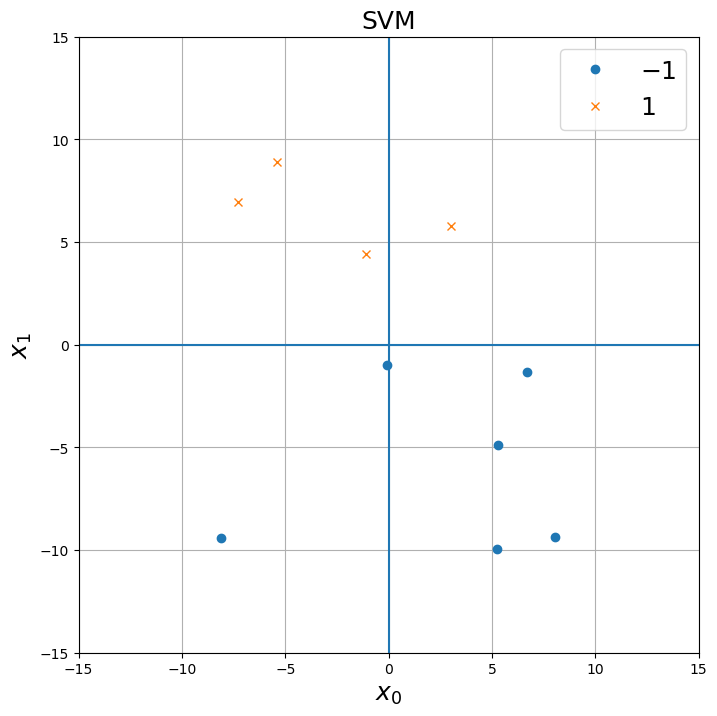

In [43]:
#Check if the lists:dataPointSet and label are set before you run this cell.
n = len(dataPointSet)
m = len(dataPointSet[0])
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([dataPointSet[i][0] for i in range(n) if label[i]==-1],[dataPointSet[i][1] for i in range(n) if label[i]==-1],'o',label='$-1$')
ax.plot([dataPointSet[i][0] for i in range(n) if label[i]==1],[dataPointSet[i][1] for i in range(n) if label[i]==1],'x',label='$1$')
ax.axhline(y=0, xmin=-4, xmax=16)
ax.axvline(x=0, ymin=0, ymax=16)
#for i in range(n):
#    ax.text(dataPointSet[i][0],dataPointSet[i][1],'  %d' % (i),fontsize=18)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
ax.set_xlabel('$x_0$',fontsize=18)
ax.set_ylabel('$x_1$',fontsize=18)
ax.set_title('SVM',fontsize=18)
ax.legend(loc='upper right',fontsize=18)
ax.grid()

The KKT condition of 
$$
\begin{array}{rl}
\min & -x_1-3x_2\\
s.t. & x_1-2x_2 \geq -4\\
     & -x_1-x_2\geq -4\\
     &x_1,x_2\geq 0
\end{array}
$$
is given by
$$
\left\{
\begin{array}{l}
x_1-2x_2-x_3=-4\\
-x_1-x_2-x_4=-4\\
x_1,x_2,x_3,x_4\geq 0\\
y_1-y_2+y_3=-1\\
-2y_1-y_2+y_4=-3\\
y_1,y_2,y_3,y_4\geq 0\\
y_1(x_1-2x_2+4)+y_2(-x_1-x_2+4)=0\\
y_3x_1+y_4x_2=0
\end{array}
\right.
$$

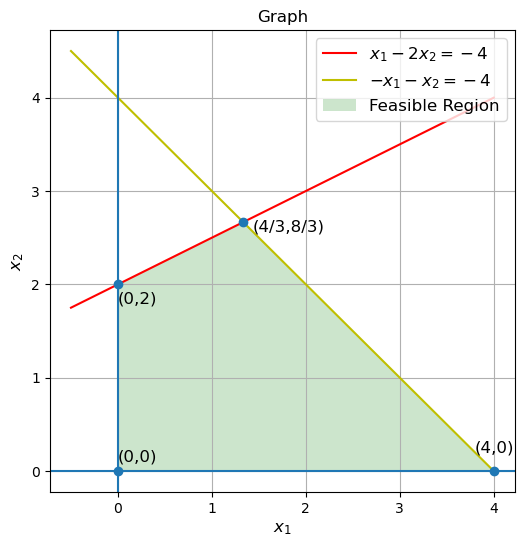

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
x = np.linspace(-1/2,4,100)
y = (x+4)/2
z= -x+4
min_y_z=[]
for i in range(len(y)):
    min_y_z.append(min([y[i],z[i]]))
min_y_z=np.array(min_y_z)
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot(x, z, '-y', label='$-x_1-x_2 = -4$')
ax.plot([0,0,4/3,4],[0,2,8/3,0],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)

ax.set_xlabel('$x_1$',fontsize=12)
ax.set_ylabel('$x_2$',fontsize=12)
ax.set_title('Graph',fontsize=12)
ax.text(0,0.1,'(0,0)',fontsize=12)
ax.text(0,1.8,'(0,2)',fontsize=12)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=12)
ax.text(4-0.2,0+0.2,'(4,0)',fontsize=12)
ax.fill_between(x,0,min_y_z,where=(x >= 0),facecolor="green", alpha=0.2,label="Feasible Region")
ax.legend(loc='upper right',fontsize=12)
ax.grid()

In [45]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# def determineStepSize(x,d,r):
#     n=len(d)
#     stepSize=float("inf")
#     for i in range(n):
#         if d[i] < 0 and stepSize>-x[i]/d[i]:
#             stepSize=-x[i]/d[i]
#     stepSize=min([1,r*stepSize])
#     return stepSize

# iterationNo=[]
# iterationX=[]
# #iterationX1=[]
# #iterationX2=[]
# #iterationX3=[]
# #iterationX4=[]
# iterationX5=[]
# iterationX6=[]
# iterationX7=[]
# iterationX8=[]

# A=[[1,-2,-1,0],[-1,-1,0,-1]]
# b=[[-4],[-4]]
# c=[[-1],[-3],[0],[0]]
# mu_0=10
# r=0.99
# epsilon=1e-6

# n=len(A[0])
# m=len(A)

# if n <= 4:
#     for i in range(n):
#         iterationX.append([])

# A=np.array(A)
# b=np.array(b)
# c=np.array(c)

# mu=[]
# mu.append(mu_0)
# x0,y0,s0=[[1],[2],[3],[4]],[[9],[10]],[[5],[6],[7],[8]]
# x0=np.array(x0)
# y0=np.array(y0)
# s0=np.array(s0)
# e=np.ones((n,1))

# k=0
# while mu[k]>epsilon*mu_0:

#     solution=np.vstack((x0,y0,s0))
#     X=np.diag(x0[:,0])
#     S=np.diag(s0[:,0])

#     r1=b-A.dot(x0)
#     r2=c-A.transpose().dot(y0)-s0
#     r3=mu[k]*e-X.dot(S).dot(e)
#     residual=np.vstack((r1,r2,r3))
    
#     A1=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
#     A2=np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))
#     A3=np.hstack((S,np.zeros((n,m)),X))
#     barA=np.vstack((A1,A2,A3))

#     NewtonDirection=np.linalg.inv(barA).dot(residual)
#     delta_x=NewtonDirection[0:n,0].reshape(n,1)
#     delta_y=NewtonDirection[n:n+m,0].reshape(m,1)
#     delta_s=NewtonDirection[n+m:2*n+m,0].reshape(n,1)
    
#     stepSizeX=determineStepSize(x0,delta_x,r)
#     stepSizeS=determineStepSize(s0,delta_s,r)
#     x0=x0+stepSizeX*delta_x
#     y0=y0+stepSizeS*delta_y
#     s0=s0+stepSizeS*delta_s
#     #mu[k+1]=(1/10)*x0.transpose().dot(s0)/4#complementary condition
#     mu.append((1/10)*x0.transpose().dot(s0)/n)
#     #print("mu is ",mu[k+1])
#     #print("stepSizeX is ",stepSizeX)
#     #print("stepSizeS is ",stepSizeS)
#     #print('k=',k)
#     #print(x0)
#     #print(y0)
#     #print(s0)

    
#     iterationNo.append(k)
#     for i in range(n):
#         iterationX[i].append(x0[i,0])
#     #iterationX1.append(x0[0,0])
#     #iterationX2.append(x0[1,0])
#     #iterationX3.append(x0[2,0])
#     #iterationX4.append(x0[3,0])
#     iterationX5.append(r1.transpose().dot(r1)[0,0])
#     iterationX6.append(r2.transpose().dot(r2)[0,0])
#     iterationX7.append(x0.transpose().dot(s0)[0,0])
#     iterationX8.append(c.transpose().dot(x0)[0,0])
#     k=k+1    

# #Table={"k":iterationNo,"$x_{0}$":iterationX1,"$x_{1}$":iterationX2,"$x_{2}$":iterationX3,"$x_{3}$":iterationX4,"norm($r_1$)":iterationX5,"norm($r_2$)":iterationX6,"$x^{t}s$":iterationX7,"$c^tx$":iterationX8}
# Table={"k":iterationNo}
# if n <= 4:
#     for i in range(n):
#         Table["$x_{"+str(i)+"}$"]=iterationX[i]
# Table["norm($r_1$)"]=iterationX5
# Table["norm($r_2$)"]=iterationX6
# Table["$x^{t}s$"]=iterationX7
# Table["$c^tx$"]=iterationX8

# Table=pd.DataFrame(Table).set_index("k")
# Table

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def determineStepSize(x,d,r):
    n=len(d)
    stepSize=float("inf")
    for i in range(n_pt):
        if d[i] < 0 and stepSize>-x[i]/d[i]:
            stepSize=-x[i]/d[i]
    stepSize=min([1,r*stepSize])
    return stepSize

# iterationNo=[]
# iterationX=[]
# iterationX1=[]
# iterationX2=[]
# iterationX3=[]
# iterationX4=[]
# iterationX5=[]
# iterationX6=[]
# iterationX7=[]
# iterationX8=[]

Y=np.hstack((label_nt,-label_nt,label_nt,-label_nt,label_nt,-label_nt))
# print(Y)
# print(X2_t)
print(n_pt)

X=np.hstack((X1_t,X1_t,X2_t,X2_t,np.ones((n_pt,1)),np.ones((n_pt,1))))
# print(X)
A=np.hstack((X*Y,-np.identity(n_pt),np.identity(n_pt)))
# print(A)

b=np.ones((n_pt,1))
# print(b)

mu_0=10
r=0.99
epsilon=1e-6

if n_pt <= 4:
    for i in range(n_pt):
        iterationX.append([])

mu=[]
mu.append(mu_0)
x0=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26]]
y0=[[9],[10],[11],[12],[13],[6],[7],[8],[9],[10]]
s0=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26]]

x0=np.array(x0)
y0=np.array(y0)
s0=np.array(s0)

C=1
c=np.hstack((np.array([[x0[0,0],x0[1,0],x0[2,0],x0[3,0]]]),np.zeros((1,2+n_pt)),C*np.ones((1,n_pt))))
c=c.transpose()
# print(c)

n=len(A[0])
m=len(A)

e=np.ones((n,1))

# print(A)
# print(x0)

k=0
while mu[k]>epsilon*mu_0:

    solution=np.vstack((x0,y0,s0))
    X=np.diag(x0[:,0])
    S=np.diag(s0[:,0])

    r1=b-A.dot(x0)
    r2=c-A.transpose().dot(y0)-s0
    r3=mu[k]*e-X.dot(S).dot(e)
    residual=np.vstack((r1,r2,r3))
    
    A1=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    A2=np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))
    A3=np.hstack((S,np.zeros((n,m)),X))
    barA=np.vstack((A1,A2,A3))

    NewtonDirection=np.linalg.inv(barA).dot(residual)
    delta_x=NewtonDirection[0:n,0].reshape(n,1)
    delta_y=NewtonDirection[n:n+m,0].reshape(m,1)
    delta_s=NewtonDirection[n+m:2*n+m,0].reshape(n,1)
    
    stepSizeX=determineStepSize(x0,delta_x,r)
    stepSizeS=determineStepSize(s0,delta_s,r)
    x0=x0+stepSizeX*delta_x
    y0=y0+stepSizeS*delta_y
    s0=s0+stepSizeS*delta_s
    
    c=c.transpose()
    c=np.hstack((np.array([[x0[0,0],x0[1,0],x0[2,0],x0[3,0]]]),np.zeros((1,2+n_pt)),C*np.ones((1,n_pt))))
    c=c.transpose()
    
    #mu[k+1]=(1/10)*x0.transpose().dot(s0)/4#complementary condition
    mu.append((1/10)*x0.transpose().dot(s0)/n)
    #print("mu is ",mu[k+1])
    #print("stepSizeX is ",stepSizeX)
    #print("stepSizeS is ",stepSizeS)
    #print('k=',k)
    #print(x0)
    #print(y0)
    #print(s0)

    
#     iterationNo.append(k)
#      for i in range(n):
#         iterationX[i].append(x0[i,0])
#         iterationX1.append(x0[0,0])
#         iterationX2.append(x0[1,0])
#         iterationX3.append(x0[2,0])
#         iterationX4.append(x0[3,0])
#         iterationX5.append(r1.transpose().dot(r1)[0,0])
#         iterationX6.append(r2.transpose().dot(r2)[0,0])
#         iterationX7.append(x0.transpose().dot(s0)[0,0])
#         iterationX8.append(c.transpose().dot(x0)[0,0])
    k=k+1    

#Table={"k":iterationNo,"$x_{0}$":iterationX1,"$x_{1}$":iterationX2,"$x_{2}$":iterationX3,"$x_{3}$":iterationX4,"norm($r_1$)":iterationX5,"norm($r_2$)":iterationX6,"$x^{t}s$":iterationX7,"$c^tx$":iterationX8}
# Table={"k":iterationNo}
# if n <= 4:
#     for i in range(n):
#         Table["$x_{"+str(i)+"}$"]=iterationX[i]
# Table["norm($r_1$)"]=iterationX5
# Table["norm($r_2$)"]=iterationX6
# Table["$x^{t}s$"]=iterationX7
# Table["$c^tx$"]=iterationX8

# Table=pd.DataFrame(Table).set_index("k")
# Table

# print(x0)
# print(x0[0,0],x0[1,0],x0[2,0],x0[3,0],x0[4,0],x0[5,0])

10


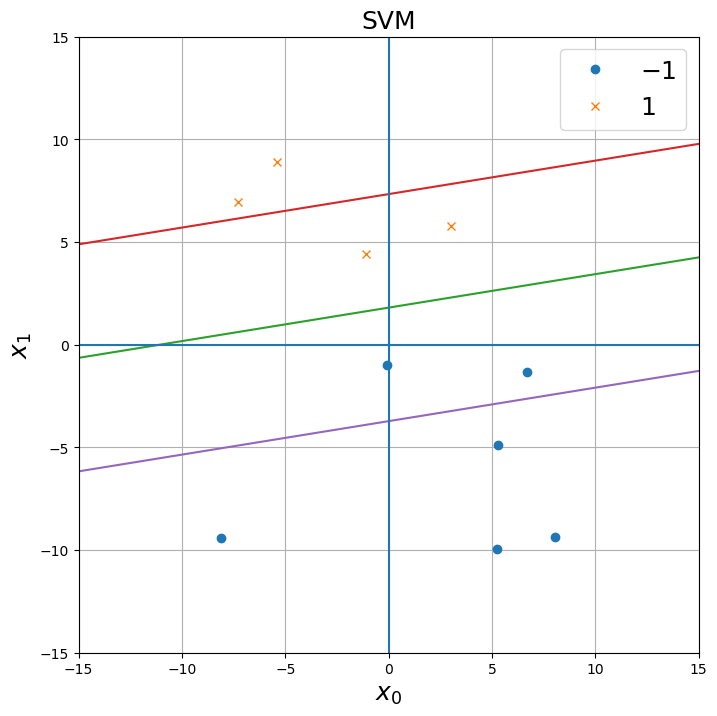

In [47]:
#Check if the lists:dataPointSet and label are set before you run this cell.
n = len(dataPointSet)
m = len(dataPointSet[0])

# print(x0)
x = np.linspace(-15,15,100)
# -(x0[2,0]-x0[3,0])*y=(x0[0,0]-x[1,0])*x+(x[4,0]-x[5,0])
y0=-((x0[0,0]-x0[1,0])/(x0[2,0]-x0[3,0]))*x-(x0[4,0]-x0[5,0])/(x0[2,0]-x0[3,0])
y1=-((x0[0,0]-x0[1,0])/(x0[2,0]-x0[3,0]))*x-(x0[4,0]-x0[5,0])/(x0[2,0]-x0[3,0])+2/(np.sqrt((x0[0,0]-x0[1,0])**2+(x0[2,0]-x0[3,0])**2))
y2=-((x0[0,0]-x0[1,0])/(x0[2,0]-x0[3,0]))*x-(x0[4,0]-x0[5,0])/(x0[2,0]-x0[3,0])-2/(np.sqrt((x0[0,0]-x0[1,0])**2+(x0[2,0]-x0[3,0])**2))



fig, ax = plt.subplots(figsize=(8,8))
ax.plot([dataPointSet[i][0] for i in range(n) if label[i]==-1],[dataPointSet[i][1] for i in range(n) if label[i]==-1],'o',label='$-1$')
ax.plot([dataPointSet[i][0] for i in range(n) if label[i]==1],[dataPointSet[i][1] for i in range(n) if label[i]==1],'x',label='$1$')
ax.plot(x,y0)
ax.plot(x,y1)
ax.plot(x,y2)

ax.axhline(y=0, xmin=-4, xmax=16)
ax.axvline(x=0, ymin=0, ymax=16)
#for i in range(n):
#    ax.text(dataPointSet[i][0],dataPointSet[i][1],'  %d' % (i),fontsize=18)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
ax.set_xlabel('$x_0$',fontsize=18)
ax.set_ylabel('$x_1$',fontsize=18)
ax.set_title('SVM',fontsize=18)
ax.legend(loc='upper right',fontsize=18)
ax.grid()